In [1]:
import csv
import numpy as np

In [ ]:
"""
En este Script se intenta dar posicion a los eventos que la tienen nula.

Primero para los eventos de posicion nula se mira el resto de eventos del mismo episodio, 
y en caso de que no sean nulos, se le da como posicion la media de las latitudes y longitudes
tanto iniciales como finales de los eventos no nulos de su episodio.

Una vez hecho esto, se hace lo mismo con locations, pero solo con la posicion inicial, porque como
se demostro en un script anterior, las posiciones finales estan corruptas

"""

In [2]:
f = open('../Data/Preproceso/details.csv')
csv_file = csv.reader(f)
cabeceras = csv_file.next()

episodios = dict()

for row in csv_file:
    episodio = dict(zip(cabeceras, row))
    if row[1] in episodios:
        episodios[row[1]].append(episodio)
    else:
        episodios[row[1]] = [episodio]

n_eventos_salvados = 0

for episodio_id in episodios:
    episodio = episodios[episodio_id]
    latitudes_ini, longitudes_ini = [], []
    latitudes_fin, longitudes_fin = [], []
    
    for evento in episodio:
        if evento['BEGIN_LAT'] != '':
            latitudes_ini.append(float(evento['BEGIN_LAT']))
            longitudes_ini.append(float(evento['BEGIN_LON']))
            latitudes_fin.append(float(evento['END_LAT']))
            longitudes_fin.append(float(evento['END_LON']))
            
    media_lat_ini = np.average(latitudes_ini)
    media_lon_ini = np.average(longitudes_ini)
    media_lat_fin = np.average(latitudes_fin)
    media_lon_fin = np.average(longitudes_fin)
    
    if latitudes_ini:
        for evento in episodio:
            if evento['BEGIN_LAT'] == '':
                evento['BEGIN_LAT'] = media_lat_ini
                evento['BEGIN_LON'] = media_lon_ini
                evento['END_LAT'] = media_lat_fin
                evento['END_LON'] = media_lon_fin
                n_eventos_salvados += 1
            
print n_eventos_salvados

238


/home/jcepeda/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/jcepeda/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [3]:
fl = open('../Data/Preproceso/locations.csv')
csv_l = csv.reader(fl)
cabeceras_l = csv_l.next()[1:]

In [5]:
episodios_l = dict()

for row in csv_l:
    episodio = dict(zip(cabeceras_l[1:], row[1:]))
    if row[2] in episodios_l:
        episodios_l[row[2]].append(episodio)
    else:
        episodios_l[row[2]] = [episodio]

In [6]:
for episodio_l_id in episodios_l:
    episodio_l = episodios_l[episodio_l_id]
    
    latitudes_ini, longitudes_ini = [], []
    for evento in episodio_l:
        latitudes_ini.append(float(evento['LAT1']))
        longitudes_ini.append(float(evento['LON1']))
        
    media_lat = np.average(latitudes_ini)
    media_lon = np.average(longitudes_ini)
    
    if episodio_l_id in episodios:
        episodio_d = episodios[episodio_l_id]
        for evento in episodio_d:
            if evento['BEGIN_LAT'] == '':
                evento['BEGIN_LAT'] = media_lat
                evento['BEGIN_LON'] = media_lon
                evento['END_LAT'] = media_lat
                evento['END_LON'] = media_lon

In [7]:
eps = 0
for episodio in episodios:
    if episodios[episodio][0]['BEGIN_LAT'] != '':
        eps += 1

print eps

1904


In [8]:
import pandas as pd

In [9]:
lista = []
for episodio_id in episodios:
    for evento in episodios[episodio_id]:
        if evento['BEGIN_LAT'] != '':
            lista.append(evento)
df = pd.DataFrame(lista)
df = df.set_index('EVENT_ID')

In [10]:
df.to_csv('../Data/Preproceso/storms.csv')

In [11]:
import matplotlib.pyplot as plt

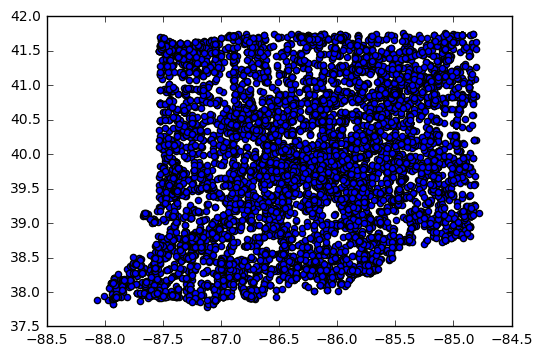

In [12]:
plt.scatter(df['BEGIN_LON'], df['BEGIN_LAT'])
plt.show()

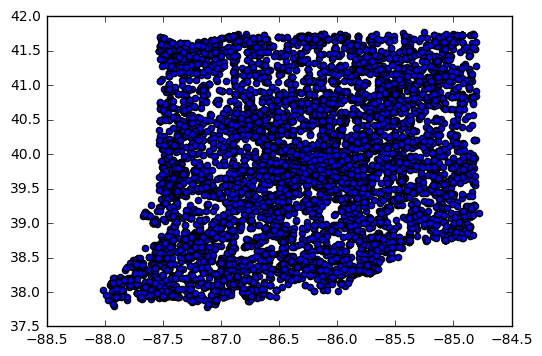

In [13]:
plt.scatter(df['END_LON'], df['END_LAT'])
plt.show()